In [1]:
# Basic packages
import numpy as np
import os
import sys
import re

#Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Modulex for reading XML, mzML, and imzML
import pymzml
from pyimzml.ImzMLParser import ImzMLParser

In [2]:
#A pymzml reading of imzML files

foo = pymzml.run.Reader('example_files/Example_Continuous.imzML')
for spec in foo:
    print foo.spectrum
    

{'MS:1000511': 0.0, 'encodedData': [None, None], 'ms level': 0.0, 'BinaryArrayOrder': [], 'defaultArrayLength': 0, 'PY:0000000': [None, None], 'id': 1, 'MS:1000128': 'profile spectrum', 'profile mass spectrum': 'profile spectrum'}
{'MS:1000511': 0.0, 'encodedData': [None, None], 'ms level': 0.0, 'BinaryArrayOrder': [], 'defaultArrayLength': 0, 'PY:0000000': [None, None], 'id': 2, 'MS:1000128': 'profile spectrum', 'profile mass spectrum': 'profile spectrum'}
{'MS:1000511': 0.0, 'encodedData': [None, None], 'ms level': 0.0, 'BinaryArrayOrder': [], 'defaultArrayLength': 0, 'PY:0000000': [None, None], 'id': 3, 'MS:1000128': 'profile spectrum', 'profile mass spectrum': 'profile spectrum'}
{'MS:1000511': 0.0, 'encodedData': [None, None], 'ms level': 0.0, 'BinaryArrayOrder': [], 'defaultArrayLength': 0, 'PY:0000000': [None, None], 'id': 4, 'MS:1000128': 'profile spectrum', 'profile mass spectrum': 'profile spectrum'}
{'MS:1000511': 0.0, 'encodedData': [None, None], 'ms level': 0.0, 'BinaryArr

p.coordinates: 
[(1, 1), (2, 1), (3, 1), (1, 2), (2, 2), (3, 2), (1, 3), (2, 3), (3, 3)] 
 
 

p.imzmldict: 
{'max count of pixels x': 3, 'max count of pixels y': 3, 'pulse duration': 10.0, 'max dimension y': 300, 'max dimension x': 300, 'focus diameter x': 10.0, 'pixel size y': 100.0, 'pixel size x': 100.0, 'attenuation': 50.0, 'pulse energy': 10.0, 'wavelength': 337.0, 'focus diameter y': 10.0, 'matrix solution concentration': 10.0} 
 
 

Index of m/z=152.916671753 in pixel 0 for location (1, 1) is 634
Index of m/z=152.916671753 in pixel 1 for location (2, 1) is 634
Index of m/z=152.916671753 in pixel 2 for location (3, 1) is 634
Index of m/z=152.916671753 in pixel 3 for location (1, 2) is 634
Index of m/z=152.916671753 in pixel 4 for location (2, 2) is 634
Index of m/z=152.916671753 in pixel 5 for location (3, 2) is 634
Index of m/z=152.916671753 in pixel 6 for location (1, 3) is 634
Index of m/z=152.916671753 in pixel 7 for location (2, 3) is 634
Index of m/z=152.916671753 in pixel

[8399, 8399, 8399, 8399, 8399, 8399, 8399, 8399, 8399]

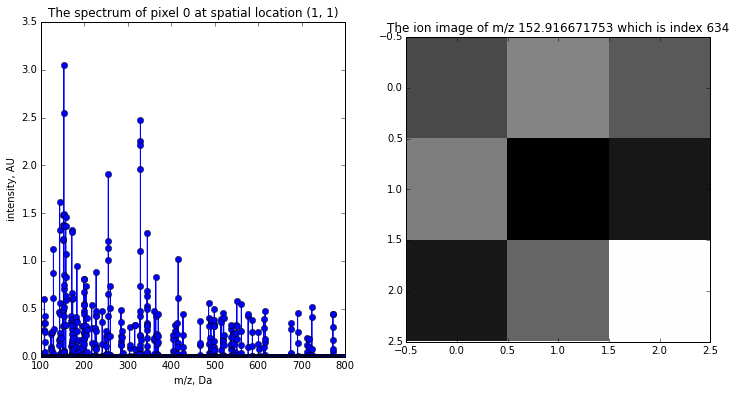

In [3]:
# pyimzML parsing

p = ImzMLParser('example_files/Example_Continuous.imzML')

# getting coordinates
print 'p.coordinates: \n', p.coordinates, '\n \n \n'   # provides a list of x, y indices of pixels

# get a dictionary with useful metadata about the file
print 'p.imzmldict: \n', p.imzmldict, '\n \n \n'

# make two plots
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot a spectrum
ind = 0
mz, intens = p.getspectrum(ind)
ax[0].plot(mz, intens, '-o')
ax[0].set_xlabel('m/z, Da')
ax[0].set_ylabel('intensity, AU')
ax[0].set_title('The spectrum of pixel %s at spatial location %s' % (ind, p.coordinates[ind]))

# plot an ion image
mzmax = mz[np.asarray(intens).argmax()]
im = p.getionimage(mzmax)
ax[1].imshow(im, cmap=cm.Greys_r, interpolation="none")
ax[1].set_title('The ion image of m/z %s which is index %s' % (mzmax, np.asarray(intens).argmax()))

# print index of mzmax for each pixel to show that this is cube-like data
for ind, loc in enumerate(p.coordinates):
    mz, intens = p.getspectrum(ind)
    print 'Index of m/z=%s in pixel %s for location %s is %s' % (mzmax, ind, loc, np.abs((np.asarray(mz) - mzmax)).argmin())
    
# print other elements of p

p.intensityLengths
    

In [4]:
# function to print an attribute of the parser
def printAttribute(obj, attr):
    print attr + ':\n', getattr(obj, attr), '\n\n\n'
    
# function to filter out private methods from dir() results
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('__')]

In [5]:
# print all the attributes of the parser in a legible way
for attr in vdir(p):
    printAttribute(p, attr)

coordinates:
[(1, 1), (2, 1), (3, 1), (1, 2), (2, 2), (3, 2), (1, 3), (2, 3), (3, 3)] 



filename:
example_files/Example_Continuous.imzML 



get_spectrum_as_string:
<bound method ImzMLParser.get_spectrum_as_string of <pyimzml.ImzMLParser.ImzMLParser instance at 0x1042c7a28>> 



getionimage:
<bound method ImzMLParser.getionimage of <pyimzml.ImzMLParser.ImzMLParser instance at 0x1042c7a28>> 



getspectrum:
<bound method ImzMLParser.getspectrum of <pyimzml.ImzMLParser.ImzMLParser instance at 0x1042c7a28>> 



imzmldict:
{'max count of pixels x': 3, 'max count of pixels y': 3, 'pulse duration': 10.0, 'max dimension y': 300, 'max dimension x': 300, 'focus diameter x': 10.0, 'pixel size y': 100.0, 'pixel size x': 100.0, 'attenuation': 50.0, 'pulse energy': 10.0, 'wavelength': 337.0, 'focus diameter y': 10.0, 'matrix solution concentration': 10.0} 



intGroupId:
intensityArray 



intensityLengths:
[8399, 8399, 8399, 8399, 8399, 8399, 8399, 8399, 8399] 



intensityOffsets:
[33612, 67208

# What are mzOffsets and intensityOffsets?

## The ImzMLParser code
The code at https://github.com/pyIMS/pyimzML/blob/master/pyimzml/ImzMLParser.py link these terms to the "controlled vocabulary" used in the imzML XML schema.  Specifically the lines `mzOffsetElem = eListSorted[0].find('%scvParam[@accession="IMS:1000102"]' % (self.sl))` and `intensityOffsetElem = eListSorted[1].find('%scvParam[@accession="IMS:1000102"]' % (self.sl))` and the surrounding lines associate the offsets with XML vocabulary words `IMS:1000102` and (in a later line) `IMS:1000103`.

## The imzML schema
The controlled vocabulary is at http://imzml.org/download/imzml/imagingMS.obo .  That page notes:

> [Term]
id: IMS:1000102
name: external offset
def: "The position where the data of an array of a mass spectrum begins." [COMPUTIS:IMS]
xref: value-type:xsd\:nonNegativeInteger "The allowed value-type for this CV term."
relationship: is_a IMS:1000001 ! Ibd Offest Handle
relationship: has_units UO:0000233 ! Byte

> [Term]
id: IMS:1000103
name: external array length
def: "Describes how many fields an array contains." [COMPUTIS:IMS]
xref: value-type:xsd\:nonNegativeInteger "The allowed value-type for this CV term."
relationship: is_a IMS:1000001 ! Ibd Offest Handle
relationship: has_units UO:0000189 ! Count

Thus these variables give pointers into the binary bitstream of numbers that is the mass spectral data.  The numbers specifiy how many binary digits go into each mz value and intensity value, I think.  They don't refer to corrections that need to be made to the obtained data to make it valid.